# Random Variables and Distributions Using the Iris Dataset

The Iris dataset is a classic dataset in data science and machine learning. It includes:
- Features: Sepal length, sepal width, petal length, and petal width.
- Target: Species (Setosa, Versicolor, Virginica).

This section explores:
1. Discrete vs. Continuous Random Variables
2. PMF and PDF
3. CDF

Each concept is applied to the Iris dataset for practical insights.


In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Rename columns for clarity
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Discrete vs. Continuous Random Variables

### Application to the Iris Dataset:
1. **Discrete Variable**:
   - Species is a discrete random variable, with values: Setosa, Versicolor, Virginica.
   - Example: P(Species = Setosa).

2. **Continuous Variable**:
   - Sepal length, sepal width, petal length, and petal width are continuous random variables.
   - Example: Distribution of petal lengths.

### Visualizing Species Distribution:
A bar chart is used to display the frequency of each species.


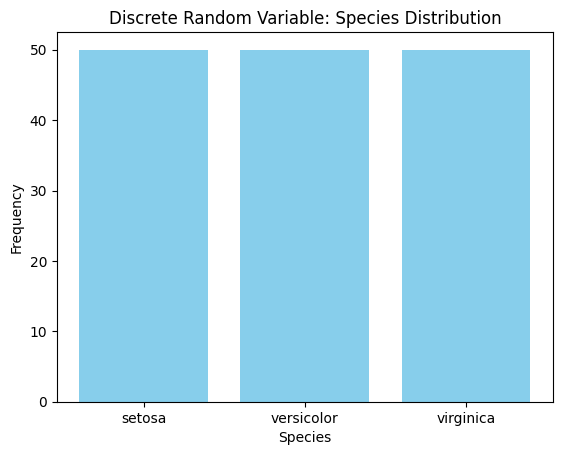

In [2]:
import matplotlib.pyplot as plt

# Discrete Variable: Species distribution
species_counts = df['species'].value_counts()

plt.bar(species_counts.index, species_counts.values, color='skyblue')
plt.title("Discrete Random Variable: Species Distribution")
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.show()


## PMF and PDF Using the Iris Dataset

### PMF (Discrete Variable: Species):
- Represents the probability of selecting a specific species.

### PDF (Continuous Variable: Sepal Length):
- Represents the density of sepal lengths.

### Why It Matters:
- PMF helps analyze class distributions in datasets.
- PDF provides insights into the distribution of continuous features.


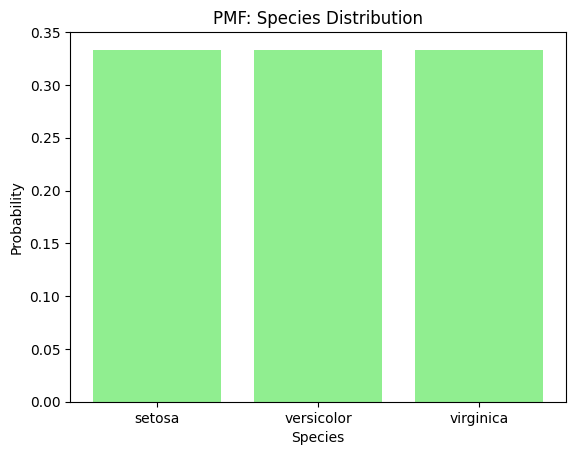

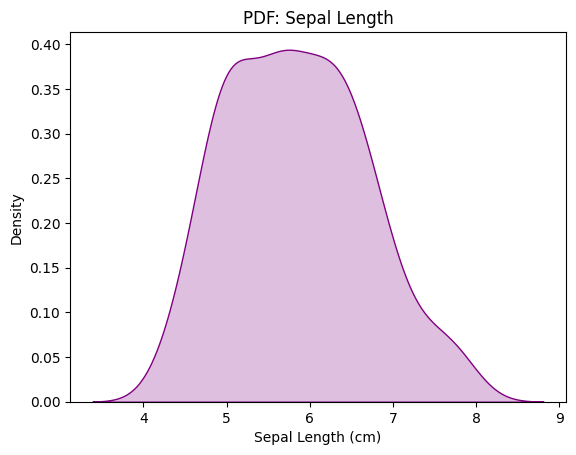

In [3]:
import seaborn as sns

# PMF: Species distribution as probabilities
pmf_species = species_counts / species_counts.sum()

plt.bar(pmf_species.index, pmf_species.values, color='lightgreen')
plt.title("PMF: Species Distribution")
plt.xlabel("Species")
plt.ylabel("Probability")
plt.show()

# PDF: Continuous variable (Sepal Length)
sns.kdeplot(df['sepal_length'], fill=True, color='purple')
plt.title("PDF: Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")
plt.show()


## CDF Using the Iris Dataset

### Definition:
The CDF gives the cumulative probability of a random variable being less than or equal to a value.

### Application:
1. For **discrete variables** (Species), CDF represents cumulative proportions.
2. For **continuous variables** (Sepal Length), CDF is computed from the sorted data.

### Visualizing CDF:
- A step function for discrete variables.
- A smooth curve for continuous variables.


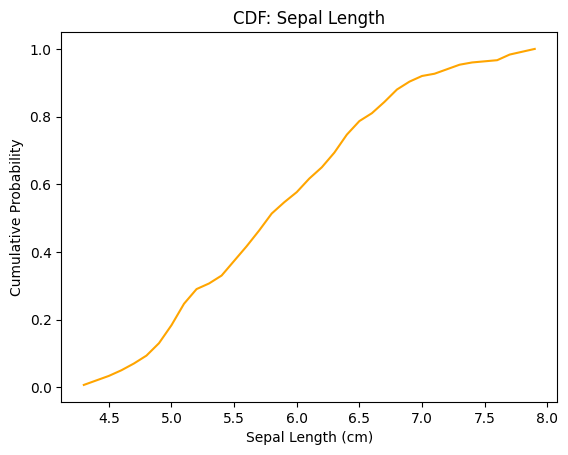

In [4]:
# CDF: Continuous variable (Sepal Length)
sorted_sepal_length = df['sepal_length'].sort_values()
cdf_sepal_length = sorted_sepal_length.rank(pct=True)

plt.plot(sorted_sepal_length, cdf_sepal_length, color='orange')
plt.title("CDF: Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Cumulative Probability")
plt.show()


# Real-World Insights

### PMF Insights:
- The distribution of species helps identify imbalances in the dataset.
- In this dataset, all three species are equally represented.

### PDF Insights:
- The density plot of sepal lengths indicates the typical range and spread.
- Outliers or clusters can be identified visually.

### CDF Insights:
- The cumulative distribution provides probabilities for specific ranges.
- Example: The probability of a sepal length being less than 6 cm.

These insights are critical for exploratory data analysis and preprocessing.


In [5]:
# Example: Probability of Sepal Length < 6 cm
probability_less_than_6 = cdf_sepal_length[sorted_sepal_length < 6].iloc[-1]
print(f"Probability of Sepal Length < 6 cm: {probability_less_than_6:.2f}")


Probability of Sepal Length < 6 cm: 0.55


# Real-World Applications

### Example 1: Delivery Times
- A courier company wants to estimate the probability of delivering packages in under 30 minutes.
- **Random Variable**: Time taken to deliver a package (continuous).
- Use the CDF to calculate the proportion of deliveries under 30 minutes.

### Example 2: Customer Purchases
- A supermarket tracks the number of items customers purchase.
- **Random Variable**: Number of items purchased (discrete).
- Use the PMF to find the probability of a customer buying exactly 5 items.

### Example 3: Product Failures
- A manufacturer tracks the number of defective items per batch.
- **Random Variable**: Number of defective items (discrete).
- Use the CDF to determine the probability of having fewer than 3 defective items.


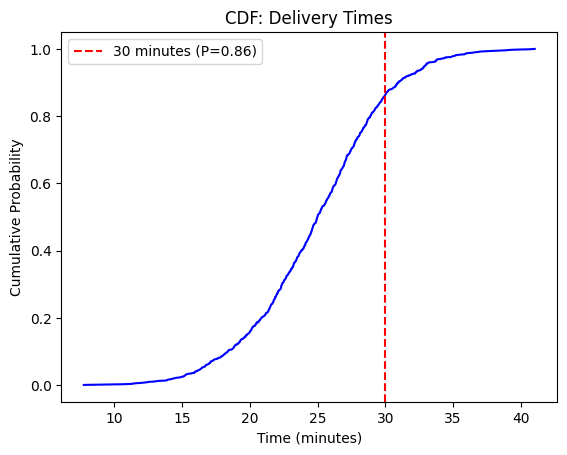

Probability of delivering in under 30 minutes: 0.86


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate delivery times (continuous random variable)
mean_delivery_time = 25  # Mean delivery time in minutes
std_dev_delivery_time = 5  # Standard deviation in minutes
delivery_times = np.random.normal(loc=mean_delivery_time, scale=std_dev_delivery_time, size=1000)

# CDF: Proportion of deliveries under 30 minutes
sorted_delivery_times = np.sort(delivery_times)
cdf_delivery_times = np.arange(1, len(sorted_delivery_times) + 1) / len(sorted_delivery_times)

# Probability of delivery in under 30 minutes
threshold_time = 30
probability_under_30 = cdf_delivery_times[sorted_delivery_times <= threshold_time][-1]

# Plot the CDF
plt.plot(sorted_delivery_times, cdf_delivery_times, color='blue')
plt.axvline(x=threshold_time, color='red', linestyle='--', label=f'30 minutes (P={probability_under_30:.2f})')
plt.title("CDF: Delivery Times")
plt.xlabel("Time (minutes)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

print(f"Probability of delivering in under 30 minutes: {probability_under_30:.2f}")


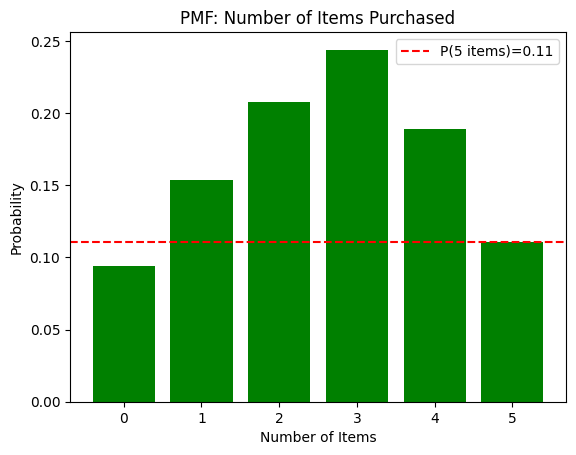

Probability of a customer buying exactly 5 items: 0.11


In [8]:
# Simulate number of items purchased (discrete random variable)
purchase_probabilities = [0.1, 0.15, 0.2, 0.25, 0.2, 0.1]  # Probabilities for 0-5 items
purchase_items = np.random.choice([0, 1, 2, 3, 4, 5], size=1000, p=purchase_probabilities)

# PMF: Probability of buying exactly 5 items
values, counts = np.unique(purchase_items, return_counts=True)
pmf = counts / len(purchase_items)

# Probability of buying exactly 5 items
probability_of_5_items = pmf[values == 5][0]

# Plot the PMF
plt.bar(values, pmf, color='green')
plt.axhline(y=probability_of_5_items, color='red', linestyle='--', label=f'P(5 items)={probability_of_5_items:.2f}')
plt.title("PMF: Number of Items Purchased")
plt.xlabel("Number of Items")
plt.ylabel("Probability")
plt.legend()
plt.show()

print(f"Probability of a customer buying exactly 5 items: {probability_of_5_items:.2f}")


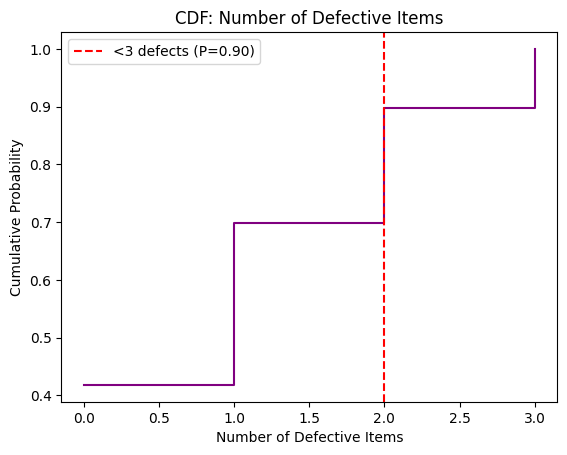

Probability of fewer than 3 defective items: 0.90


In [9]:
# Simulate number of defective items (discrete random variable)
batch_probabilities = [0.4, 0.3, 0.2, 0.1]  # Probabilities for 0-3 defective items
defective_items = np.random.choice([0, 1, 2, 3], size=1000, p=batch_probabilities)

# CDF: Probability of fewer than 3 defective items
values, counts = np.unique(defective_items, return_counts=True)
pmf_defects = counts / len(defective_items)
cdf_defects = np.cumsum(pmf_defects)

# Probability of having fewer than 3 defective items
threshold_defects = 2
probability_fewer_than_3 = cdf_defects[threshold_defects]

# Plot the CDF
plt.step(values, cdf_defects, where='post', color='purple')
plt.axvline(x=threshold_defects, color='red', linestyle='--', label=f'<3 defects (P={probability_fewer_than_3:.2f})')
plt.title("CDF: Number of Defective Items")
plt.xlabel("Number of Defective Items")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

print(f"Probability of fewer than 3 defective items: {probability_fewer_than_3:.2f}")
